In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from keras.datasets import imdb

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


<br>
<br>

# 데이터 로드

In [2]:
# IMDb 리뷰 데이터를 최대 단어 10000개로 제한하여 가져옴
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

만약 'Object arrays cannot be loaded when allow_pickle=False'라는 에러가 발생한다면 numpy의 버전을 낮추어야 합니다. 현재 케라스와 numpy 최신 버전 사이에 충돌이 발생합니다. 아래와 같이 1.16.2 버전으로 재설치하시기 바랍니다.

pip uninstall numpy<br>
pip install numpy==1.16.2
<br>
<br>
<br>

In [3]:
# 훈련셋 크기
train_data.shape


(25000,)

In [4]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
# 훈련셋 라벨 크기
train_labels.shape


(25000,)

In [6]:
# 테스트셋 크기
test_data.shape


(25000,)

In [7]:
# 테스트셋 라벨 크기
test_labels.shape


(25000,)

In [8]:
# 첫 번째 훈련셋 출력
# 각 단어가 0~9999 사이의 인덱스 숫자로 변환되어 있음
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
# 첫 번째 훈련셋 라벨 출력
# 부정 -> 0, 긍정 -> 1
train_labels[0]


1

In [10]:
# 훈련셋의 최대 인덱스
max([max(seq) for seq in train_data])


9999

In [11]:
# 훈련셋의 최소 인덱스
min([min(seq) for seq in train_data])


1

문서의 인덱스에서 0은 '패딩', 1은 '문서 시작', 2는 '사전에 없음'을 나타냅니다. train_data에 패딩이 없기 때문에 최소 인덱스가 1로 표시되었습니다.

<br>
<br>

# 인덱스로 된 문장을 단어로 확인

In [12]:
# 각 단어와 인덱스가 매핑된 딕셔너리
word_index = imdb.get_word_index()

In [13]:
# 빈도수에 따라 정렬되어 있어, 낮은 숫자가 자주 나오는 단어
word_index


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [14]:
# 인덱스와 단어로 딕셔너리를 뒤집음
word_index_reverse = dict([(value, key) for (key, value) in word_index.items()])

# train_data에서 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'
# word_index에는 위의 태그가 없기 때문에 인덱스에서 3을 빼고 검색
# 사전에 없는 단어는 ?로 표시
text = ' '.join([word_index_reverse.get(i - 3, '?') + '(' + str(i) + ')'
                 for i in train_data[0]])

In [15]:
# train_data의 첫 번째 문서 출력
text


"?(1) this(14) film(22) was(16) just(43) brilliant(530) casting(973) location(1622) scenery(1385) story(65) direction(458) everyone's(4468) really(66) suited(3941) the(4) part(173) they(36) played(256) and(5) you(25) could(100) just(43) imagine(838) being(112) there(50) robert(670) ?(2) is(9) an(35) amazing(480) actor(284) and(5) now(150) the(4) same(172) being(112) director(167) ?(2) father(336) came(385) from(39) the(4) same(172) scottish(4536) island(1111) as(17) myself(546) so(38) i(13) loved(447) the(4) fact(192) there(50) was(16) a(6) real(147) connection(2025) with(19) this(14) film(22) the(4) witty(1920) remarks(4613) throughout(469) the(4) film(22) were(71) great(87) it(12) was(16) just(43) brilliant(530) so(38) much(76) that(15) i(13) bought(1247) the(4) film(22) as(17) soon(515) as(17) it(12) was(16) released(626) for(18) ?(2) and(5) would(62) recommend(386) it(12) to(8) everyone(316) to(8) watch(106) and(5) the(4) fly(2223) fishing(5244) was(16) amazing(480) really(66) crie

제일 처음 인덱스는 문서의 시작인 '?(1)'입니다. 그리고 빈도수가 낮은 10000 인덱스 이상의 단어들은 사전에 없다는 뜻인 '?(2)'으로 표시됩니다.

<br>
<br>

# 전처리

In [16]:
# 시퀀스를 벡터로 변환
def vectorize_seqs(seqs, dimension=10000):

    # 0으로 초기화된 배열을 생성
    # seqs의 개수 x dimension
    results = np.zeros((len(seqs), dimension))
    
    for i, seq in enumerate(seqs):
        # seq에서 모든 인덱스의 위치를 1로 설정
        # 10000개 차원이 문서 하나의 정보를 담고 있는 BoW(Bag of Words)
        results[i, seq] = 1
        
    return results

# 데이터를 벡터로 변환
x_train = vectorize_seqs(train_data)
x_test = vectorize_seqs(test_data)

In [17]:
# 벡터로 변환한 첫 번째 훈련 데이터 출력
x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
# 레이블을 벡터로 변환
# 0, 1 정수를 그냥 실수로 변환하는 것
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [19]:
# 벡터로 변환한 훈련 데이터 라벨 출력
y_train


array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [20]:
# 훈련셋에서 검증셋 분리
x_val = x_train[:10000]
x_train_new = x_train[10000:]

y_val = y_train[:10000]
y_train_new = y_train[10000:]

<br>
<br>

# 모델 생성

In [21]:
def build_model():

    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])    

    return model

첫 번째 Dense층의 input_shape는 BoW 벡터로 변환한 문서의 차원인 10000개입니다. 마지막 레이어의 노드 개수는 1개로, 긍정/부정인 1과 0만 출력합니다. 이렇게 이진 분류일때는 마지막 활성화 함수로 sigmoid를 사용합니다. 이전 활성화 함수는 0에서 1사이의 출력일 필요가 없기 때문에 성능이 좋은 relu로 설정하였습니다.

손실 함수는 긍정과 부정의 이진 분류이기 때문에 biniary_crossentropy를 사용하였습니다.

<br>
<br>

# 훈련 및 평가

In [22]:
# 모델 생성
model = build_model()

# 배치 사이즈는 2의 배수 -> 행렬 계산에 유리
history = model.fit(x_train_new,
                    y_train_new,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 5s 351us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/10
15000/15000 [==============================] - 5s 325us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/10
15000/15000 [==============================] - 6s 380us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3087 - val_acc: 0.8712
Epoch 4/10
15000/15000 [==============================] - 5s 344us/step - loss: 0.1750 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/10
15000/15000 [==============================] - 5s 328us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8871
Epoch 6/10
15000/15000 [==============================] - 5s 317us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3164 - val_acc: 0.8771
Epoch 7/10
15000/15000 [==============================] - 5s 346us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

In [23]:
history_dict = history.history
history_dict.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

model.fit()의 반환값인 history에 훈련 결과가 들어있습니다. 이를 사용해서 평가 그래프를 출력하도록 하겠습니다.
<br>
<br>
<br>

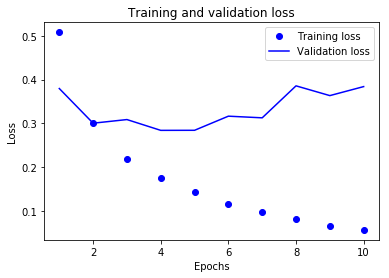

In [24]:
loss = history.history['loss']         # 훈련 손실
val_loss = history.history['val_loss'] # 검증 손실

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')      # bo -> 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b -> 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


그래프를 보면 훈련 손실은 지속적으로 감소합니다. 하지만 훈련 데이터에 포함되지 않은 검증 데이터로 판단한 검증 손실은 4번째 에폭부터 오히려 증가합니다. 바로 이 지점이 과대적합이 되는 부분입니다.
<br>
<br>
<br>

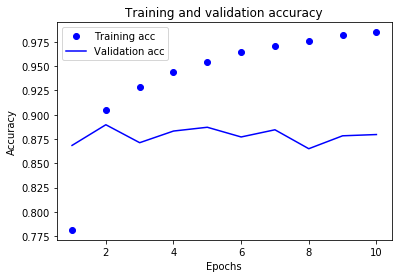

In [25]:
# 그래프 초기화
plt.clf()

acc = history.history['acc']           # 훈련 정확도
val_acc = history.history['val_acc']   # 검증 정확도

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


검증 정확도 역시 마찬가지로 4번째 에폭부터 떨어지고 있음을 확인할 수 있습니다. 이제 과대적합을 피하기 위해서 에폭을 4로 수정하고 다시 학습을 합니다.
<br>
<br>
<br>

In [26]:
model = build_model()
model.fit(x_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
25000/25000 [==============================] - 6s 221us/step - loss: 0.4513 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 6s 220us/step - loss: 0.2634 - acc: 0.9102
Epoch 3/4
25000/25000 [==============================] - 6s 238us/step - loss: 0.2056 - acc: 0.9279
Epoch 4/4
25000/25000 [==============================] - 6s 238us/step - loss: 0.1710 - acc: 0.9391


In [27]:
# 모델 저장
model.save('./model/movie_review_model.h5')

<br>
<br>

# 테스트셋 확인

In [28]:
# 저장된 모델 파일 로드
model = models.load_model('./model/movie_review_model.h5')

In [29]:
# 테스트셋 평가
results = model.evaluate(x_test, y_test)
results


25000/25000 [==============================] - 6s 223us/step


[0.3104185517501831, 0.87568]

출력의 첫 번째는 손실, 두 번째는 정확도입니다. 역시 훈련시보다는 정확도가 그리 높지는 않습니다.
<br>
<br>
<br>

In [30]:
# 테스트셋 예측
results = model.predict(x_test)
results


array([[0.15493426],
       [0.99972564],
       [0.6219525 ],
       ...,
       [0.08035986],
       [0.04220911],
       [0.490145  ]], dtype=float32)

테스트셋을 예측하면 0~1사이의 값을 얻습니다. 보통 반올림을 하여 긍정/부정으로 구분합니다.
<br>
<br>
<br>

In [31]:
# 첫 번째 문서를 문장으로 변환
text = ' '.join([word_index_reverse.get(i - 3, '?') for i in test_data[0]])

print(text)
print('\n')
print('Real    :', y_test[0])
print('Predict :', results[0].round())


? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss


Real    : 0.0
Predict : [0.]


테스트셋에 있는 첫 번째 문서의 예측 결과를 살펴보겠습니다. 실제값과 예측값 모두 '부정'으로 정확히 분류하였습니다.